In [34]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

### Read in the CSV file and prepare the Pandas DataFrame

In [2]:
# Read the csv file into a pandas DataFrame
customers_transformed_df = pd.read_csv(
    Path("../Resources/customers.csv")
)

# Review the DataFrame
customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


### Step 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

In [3]:
# Import the PCA module
from sklearn.decomposition import PCA

In [43]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=5)

In [44]:
# Fit the PCA model on the transformed credit card DataFrame
customers_pca = pca.fit_transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
customers_pca[:5]

array([[-4.72382358, -0.60489964, -1.60870571, -1.88467437, -2.08414805],
       [ 5.85571568, -1.98331135, -0.27090238,  0.7410195 , -0.0132483 ],
       [ 2.43063042, -3.15456594,  3.94758905,  1.13151819, -0.89219366],
       [-6.96050326, -1.35772617,  1.89108841, -1.24852565, -1.17304177],
       [ 2.47746793, -3.29412896,  2.43745187,  1.95241841, -0.40796253]])

### Step 2: Using the explained_variance_ratio_ function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.

In [45]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

pca.explained_variance_ratio_[:2].sum()


0.8533994303627388

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** About 85% of the total variance is condensed into the 2 PCA variables.

### Step 3: Using the customer_pca data, create a Pandas DataFrame called customers_pca_df. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [46]:
# Create the PCA DataFrame
column_headers = [f"PCA_{i}" for i in range(1, 6)]
customers_pca_df = pd.DataFrame(
    data=customers_pca, columns=column_headers
)

# customers_pca_df = pd.DataFrame(
#     data=customers_pca, columns=["PCA1", "PCA2"]
# )

# Review the PCA DataFrame
customers_pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-4.723824,-0.604900,-1.608706,-1.884674,-2.084148
1,5.855716,-1.983311,-0.270902,0.741019,-0.013248
2,2.430630,-3.154566,3.947589,1.131518,-0.892194
3,-6.960503,-1.357726,1.891088,-1.248526,-1.173042
4,2.477468,-3.294129,2.437452,1.952418,-0.407963


### Step 4: Using the customers_pca_df Dataframe, utilize the elbow method to determine the optimal value of k.

In [8]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 10))


In [49]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
small_pca_df = customers_pca_df.copy()
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(small_pca_df)
    inertia.append(k_model.inertia_)


c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [10]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,49585.714978
1,2,23750.955470
2,3,8773.667775
3,4,6840.237425
4,5,5378.277271


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

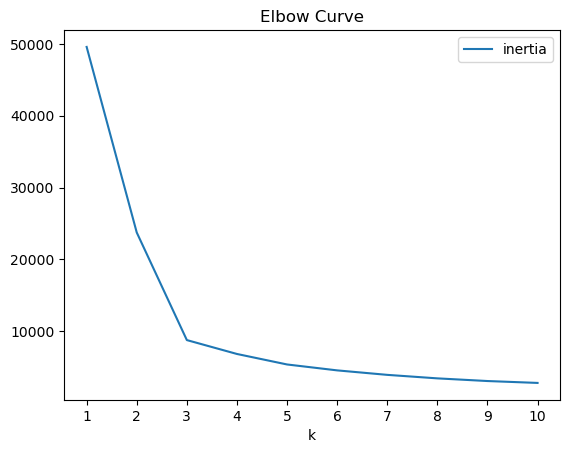

In [51]:
# Plot the DataFrame
df_elbow.hvplot.line(
                    x="k", 
                    y="inertia", 
                    title="Elbow Curve", 
                    xticks=k
)
df_elbow.plot(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

### Step 5: Segment the `customers_pca_df`  DataFrame using the K-means algorithm.

In [52]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(small_pca_df)

# Make predictions
predictions = model.predict(small_pca_df)

# Create a copy of the customers_pca_df DataFrame
cluster_df = small_pca_df.copy()

# Add a class column with the labels
cluster_df["class"] = model.labels_

# Review the DataFrame
cluster_df.head()

c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,class
0,-4.723824,-0.604900,-1.608706,-1.884674,-2.084148,0
1,5.855716,-1.983311,-0.270902,0.741019,-0.013248,1
2,2.430630,-3.154566,3.947589,1.131518,-0.892194,1
3,-6.960503,-1.357726,1.891088,-1.248526,-1.173042,0
4,2.477468,-3.294129,2.437452,1.952418,-0.407963,1


KeyError: 'PCA_1'

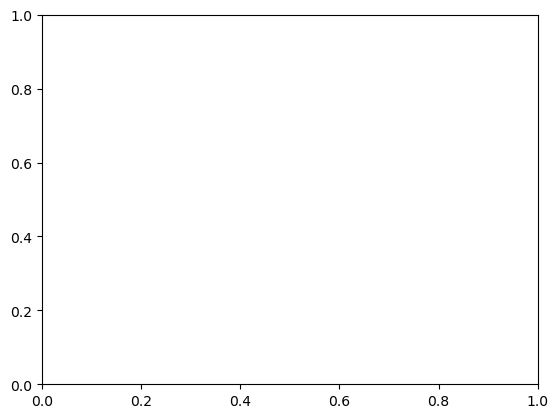

In [53]:
# Plot the clusters
# cluster_df.hvplot.scatter(
#                             x="PCA1", 
#                             y="PCA2", 
#                             by="class", 
#                             hover_cols=["class"]
# )
cluster_df.plot(
    kind="scatter",
    x= "PCA_1", 
    y="PCA_2", 
    by="class",
    hover_cols=["class"]
)


### Step 6: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [54]:
# Define the model Kmeans model using k=3 clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(customers_pca_df)

# Make predictions
predictions = model.predict(customers_pca_df)

# Create a copy of the customers_transformed_df DataFrame
clustered_df = customers_transformed_df.copy()

# Add a class column with the labels
clustered_df["class"] = model.labels_

# Display sample data
clustered_df.head()

c:\Users\vinay\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,class
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831,0
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689,1
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747,1
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925,0
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964,1


KeyError: 'feature_1'

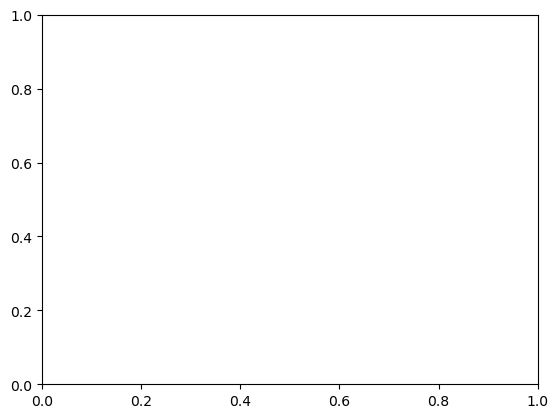

In [55]:
# Plot the clusters using the first two feature columns
# clustered_df.hvplot.scatter(
#                             x="feature_1", 
#                             y="feature_2", 
#                             by="class", 
#                             hover_cols=["class"]
# )
clustered_df.plot(
    kind="scatter",
    x= "feature_1", 
    y="feature_2", 
    by="class",
    cmap= 'tab20'
)


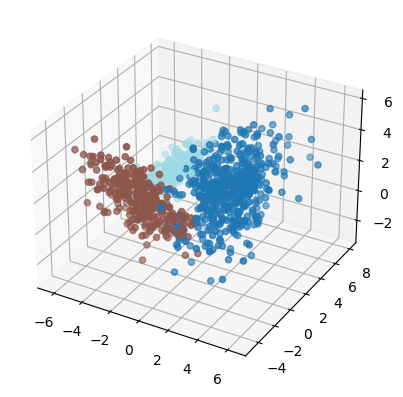

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=clustered_df["feature_1"], 
    ys=clustered_df["feature_2"], 
    zs=clustered_df["feature_3"], 
    c=clustered_df["class"],
    cmap= 'tab20'
)

In [60]:
pd.crosstab(clustered_df["class"], clustered_df["class"])

class,0,1,2
class,,,
0,509,0,0
1,0,294,0
2,0,0,197


### Step 7: What is the difference between the segmentation results of the PCA DataFrame and the full-factored DataFrame?

**Answer:** It appears that the customer segmentation information using the DataFrame with all of the factors yielded similar results that the PCA analysis. The data is grouped in clear customer segments in both cases.